# First Things First

Welcome to the SharpEdge package documentation! This package offers a range of efficient image processing functions for manipulating and transforming images.

Before we explore the available functions, it's important to understand how to work with image data. This tutorial will guide you through the process of loading images from various sources, visualizing the results and converting them into numpy arrays. We will also cover the key differences between grayscale and RGB images, and explain when and why you might need to perform color scale conversions.

By the end of this tutorial, you'll have the foundational knowledge needed to effectively use the SharpEdge functions and interpret their effects on images.

## Import Necessary Libraries

In [10]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data

## Load Image
We will start by loading an image from different sources: from the disk and from a library (`skimage`). 

### Load Image from Disk
Let's begin by loading an image locally available.

SharpEdge relies on the [skimage](https://scikit-image.org/docs/stable/api/skimage.io.html) library to load image data because it by default reads images in the range of [0, 255], which is the required input range for our functions. 

If you have a preferred image loader, such as [matplotlib's `plt.imread()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html), that by default loads images in the range of [0, 1], please ensure to transform the image data to the [0, 255] range (refer to Color Scale Conversion section) before passing it as an input into the functions.

In [50]:
# Load image locally available
image_disk = io.imread('../tests/test_image/seam_carve_input_2.png')

### Load Image from Library
Alternatively, we can load sample images directly from the `skimage` library. Skimage comes with several sample images for quick testing.

In [51]:
# Load image from skimage library (Example: moon image)
image_skimage = data.camera()

## Display Image
Now that we've loaded the image, let's display it. Here's how you can display both grayscale and RGB images using [matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html).

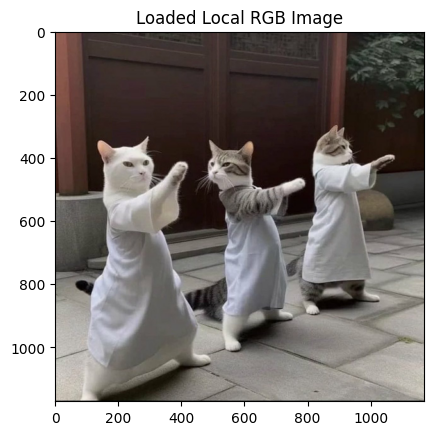

In [52]:
# Display RGB image from disk
plt.imshow(image_disk)
plt.title('Loaded Local RGB Image')
plt.show()

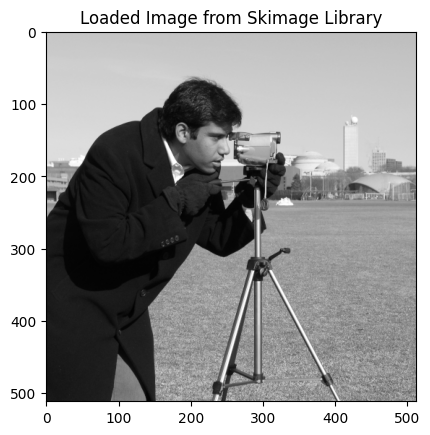

In [53]:
# Display grayscale image from skimage library
plt.imshow(image_skimage, cmap="gray")
plt.title('Loaded Image from Skimage Library')
plt.show()

## Convert Image to Numpy

After loading the image, the next step is to convert it into a numpy array. This conversion allows direct manipulation of image data for tasks such as resizing, color conversion, and feature extraction, all of which are supported by the SharpEdge package.

**Note:** All image input argument for the functions in the SharpEdge package are expected to be in numpy array format. This ensures consistency and compatibility for efficient image processing

We will now display the numpy array representation of the image, along with its value range.

In [54]:
# Convert to numpy array and check the range
image_disk_np = np.array(image_disk)
print(f'Image as numpy array (range [0, 1]):\n{image_disk_np}')

Image as numpy array (range [0, 1]):
[[[147  97  86]
  [147  97  86]
  [147  97  86]
  ...
  [ 48  50  47]
  [ 48  48  46]
  [ 48  48  46]]

 [[147  97  86]
  [147  97  86]
  [147  97  86]
  ...
  [ 51  53  50]
  [ 51  51  49]
  [ 51  51  49]]

 [[147  97  86]
  [147  97  86]
  [147  97  86]
  ...
  [ 50  52  49]
  [ 50  50  48]
  [ 50  50  48]]

 ...

 [[197 194 187]
  [195 192 185]
  [195 192 185]
  ...
  [164 163 158]
  [165 164 159]
  [165 164 159]]

 [[197 194 187]
  [195 192 185]
  [194 191 184]
  ...
  [164 163 158]
  [167 166 161]
  [167 166 161]]

 [[  1   0   0]
  [  1   0   0]
  [  1   0   0]
  ...
  [  3   2   0]
  [  1   0   0]
  [  1   0   0]]]


In [55]:
# Convert to numpy array and check the range
image_lib_np = np.array(image_skimage)
print(f'Image as numpy array (range [0, 255]):\n{image_lib_np}')

Image as numpy array (range [0, 255]):
[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]


### Grayscale (2D) vs. RGB (3D)

We would like to specifically note the difference in dimensions between grayscale and RGB images. A grayscale image is represented as a 2D array, where each pixel has a single intensity value. In contrast, an RGB image is represented as a 3D array, where each pixel contains three values corresponding to the intensity of the Red, Green, and Blue color channels.

In [42]:
# Let's print the shape of both types of images for comparison
print(f'Grayscale shape: {image_lib_np.shape}')
print(f'RGB shape: {image_disk_np.shape}')

Grayscale shape: (512, 512)
RGB shape: (1171, 1170, 3)


### Color Scale Conversion (If Needed)

As mentioned above, to ensure input range compatibility with functions within the SharpEdge package, it is necessary to convert the color scale of the image when working with images in the [0, 1] range. Below is one way to perform this conversion:

In [56]:
# Convert image from [0,1] to [0,255]
# image_converted = (image_to_convert * 255).astype(np.uint8)

## Utility Class and `input_checker` Function

Finally, you might notice that SharpEdge has a Utility class with `input_checker` function specifically designed to verify that the input data meets the necessary requirements. This utility checks the following:

- **Image format**: The image must be a numpy array. Formats such as TIFF or GIF are not supported.
- **Numpy shape**: The image must have a 3D shape for RGB images and a 2D shape for grayscale images. If unexpected or redundant channels are detected, an error will be raised.
- **Image size**: The image must not have a size of (0, 0), as this would be an invalid input.
- **Data color range**: The pixel values must be in the range of [0, 255].

Please note that this Utility Class and the `input_checker` function are intended for developer use **ONLY**. The necessary validation has already been incorporated into the individual functions, so you won’t need to manually validate inputs in most cases. The details above are provided for informational purposes only.

## Final Remarks
Now that you have the necessary tools to work with the package, feel free to dive into the various functions and explore the techniques available. Please refer to the full documentation for more details, and have fun coding and experimenting with the capabilities of the SharpEdge package!